In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import models


In [2]:
df = pd.read_csv('https://query.data.world/s/wwxfiln4tvx76s62yr2rdmk54ukrxr')


In [3]:
df["CrimeDate"] = df["CrimeDate"].astype(np.datetime64)
df


,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Location 1,Total Incidents
0,2016-11-12,02:35:00,3B,300 SAINT PAUL PL,ROBBERY - STREET,O,NaN,111.0,CENTRAL,Downtown,"(39.2924100000, -76.6140800000)",1
1,2016-11-12,02:56:00,3CF,800 S BROADWAY,ROBBERY - COMMERCIAL,I,FIREARM,213.0,SOUTHEASTERN,Fells Point,"(39.2824200000, -76.5928800000)",1
2,2016-11-12,03:00:00,6D,1500 PENTWOOD RD,LARCENY FROM AUTO,O,NaN,413.0,NORTHEASTERN,Stonewood-Pentwood-Winston,"(39.3480500000, -76.5883400000)",1
3,2016-11-12,03:00:00,6D,6600 MILTON LN,LARCENY FROM AUTO,O,NaN,424.0,NORTHEASTERN,Westfield,"(39.3626300000, -76.5516100000)",1
4,2016-11-12,03:00:00,6E,300 W BALTIMORE ST,LARCENY,O,NaN,111.0,CENTRAL,Downtown,"(39.2893800000, -76.6197100000)",1
...,...,...,...,...,...,...,...,...,...,...,...,...
285802,2011-01-01,22:15:00,4D,6800 MCCLEAN BD,AGG. ASSAULT,I,HANDS,423.0,NORTHEASTERN,Hamilton Hills,"(39.3704700000, -76.5670500000)",1
285803,2011-01-01,22:30:00,6J,3000 ODONNELL ST,LARCENY,I,NaN,232.0,SOUTHEASTERN,Canton,"(39.2804600000, -76.5727300000)",1
285804,2011-01-01,23:00:00,7A,2500 ARUNAH AV,AUTO THEFT,O,NaN,721.0,WESTERN,Evergreen Lawn,"(39.2954200000, -76.6592800000)",1
285805,2011-01-01,23:25:00,4E,100 N MONROE ST,COMMON ASSAULT,I,HANDS,714.0,WESTERN,Penrose/Fayette Street Outreach,"(39.2899900000, -76.6470700000)",1


In [4]:
data = df.groupby("CrimeDate").count()["Total Incidents"].to_frame().rolling(7).mean()[7:-100]
# data["tmp"] = df.groupby("CrimeDate").count()["Total Incidents"]
data.head(20)

,Total Incidents
CrimeDate,
2011-01-08,116.428571
2011-01-09,115.857143
2011-01-10,117.142857
2011-01-11,118.142857
2011-01-12,110.285714
2011-01-13,111.285714
2011-01-14,106.285714
2011-01-15,108.428571
2011-01-16,107.857143


<AxesSubplot:xlabel='CrimeDate'>

<Figure size 1440x720 with 0 Axes>

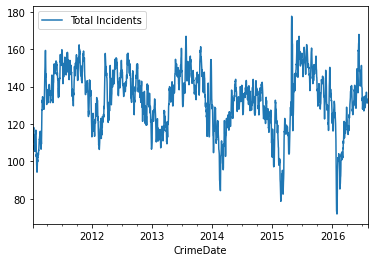

In [5]:
plt.figure(figsize=(20, 10))
data.plot()


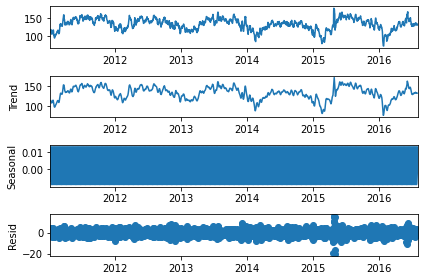

In [6]:
tmp = seasonal_decompose(data).plot()


/home/michla/.local/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


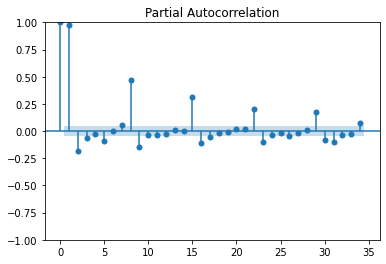

In [7]:
tmp = plot_pacf(data)


MSR: 28.01812970953294


<Figure size 1440x720 with 0 Axes>

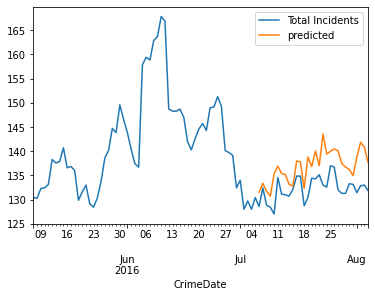

In [9]:
window_size, step_size = 30, 30

model = models.MultiStepForecaster(window_size, step_size)

preds, err = model.fit(data[:-step_size], data[:-step_size])

plt.figure(figsize=(20, 10))
model.plot(data, data)
plt.show()

MSR: 38.34929981768839


<Figure size 1440x720 with 0 Axes>

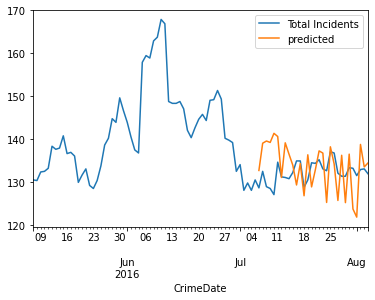

In [10]:
window_size, step_size = 100, 30

model = models.MultiStepForecaster(window_size, step_size)

preds, err = model.fit(data[:-step_size], data[:-step_size])

plt.figure(figsize=(20, 10))
model.plot(data, data)
plt.show()

MSR: 57.09616130325044


<Figure size 1440x720 with 0 Axes>

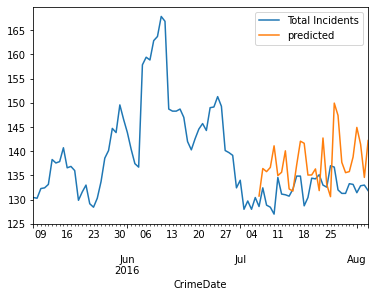

In [11]:
window_size, step_size = 300, 30

model = models.MultiStepForecaster(window_size, step_size)

preds, err = model.fit(data[:-step_size], data[:-step_size])

plt.figure(figsize=(20, 10))
model.plot(data, data)
plt.show()

MSR: 35.75771815847679


<Figure size 1440x720 with 0 Axes>

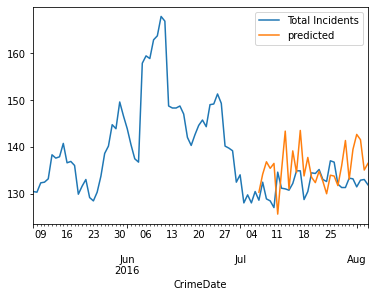

In [12]:
window_size, step_size = 500, 30

model = models.MultiStepForecaster(window_size, step_size)

preds, err = model.fit(data[:-step_size], data[:-step_size])

plt.figure(figsize=(20, 10))
model.plot(data, data)
plt.show()

MSR: 369.4281029406541


<Figure size 1440x720 with 0 Axes>

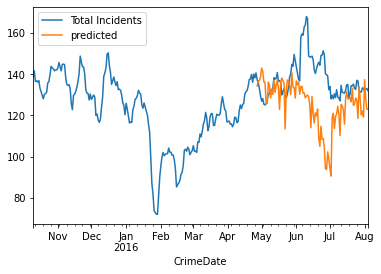

In [13]:
window_size, step_size = 100, 100

model = models.MultiStepForecaster(window_size, step_size)

preds, err = model.fit(data[:-step_size], data[:-step_size])

plt.figure(figsize=(20, 10))
model.plot(data, data)
plt.show()

MSR: 123.65262790166724


<Figure size 1440x720 with 0 Axes>

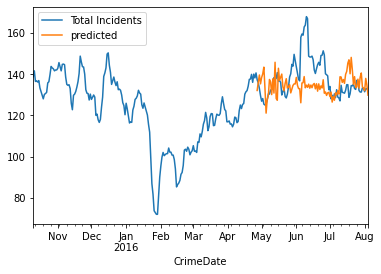

In [14]:
window_size, step_size = 300, 100

model = models.MultiStepForecaster(window_size, step_size)

preds, err = model.fit(data[:-step_size], data[:-step_size])

plt.figure(figsize=(20, 10))
model.plot(data, data)
plt.show()

MSR: 100.55929748099405


<Figure size 1440x720 with 0 Axes>

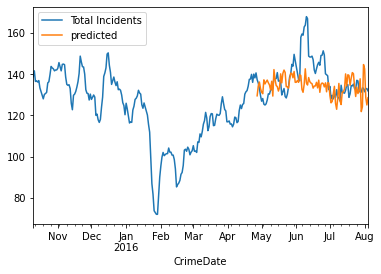

In [15]:
window_size, step_size = 500, 100

model = models.MultiStepForecaster(window_size, step_size)

preds, err = model.fit(data[:-step_size], data[:-step_size])

plt.figure(figsize=(20, 10))
model.plot(data, data)
plt.show()

MSR: 22.83120656062416


<Figure size 1440x720 with 0 Axes>

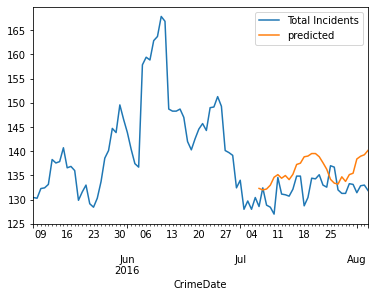

In [16]:
window_size, step_size = 30, 30

model = models.OneStepForecaster(window_size, step_size)

preds, err = model.fit(data[:-step_size], data[:-step_size])

plt.figure(figsize=(20, 10))
model.plot(data, data)
plt.show()

MSR: 29.66681519817769


<Figure size 1440x720 with 0 Axes>

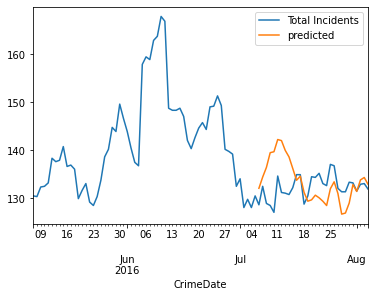

In [17]:
window_size, step_size = 100, 30

model = models.OneStepForecaster(window_size, step_size)

preds, err = model.fit(data[:-step_size], data[:-step_size])

plt.figure(figsize=(20, 10))
model.plot(data, data)
plt.show()

MSR: 51.661026210915836


<Figure size 1440x720 with 0 Axes>

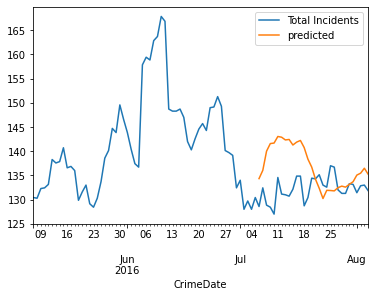

In [18]:
window_size, step_size = 300, 30

model = models.OneStepForecaster(window_size, step_size)

preds, err = model.fit(data[:-step_size], data[:-step_size])

plt.figure(figsize=(20, 10))
model.plot(data, data)
plt.show()

MSR: 54.75313403362308


<Figure size 1440x720 with 0 Axes>

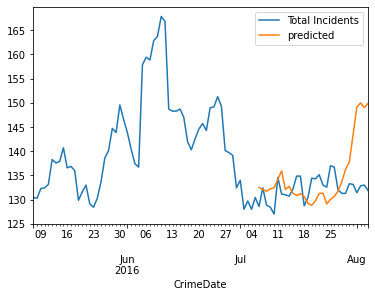

In [19]:
window_size, step_size = 500, 30

model = models.OneStepForecaster(window_size, step_size)

preds, err = model.fit(data[:-step_size], data[:-step_size])

plt.figure(figsize=(20, 10))
model.plot(data, data)
plt.show()

MSR: 459.99838362061126


<Figure size 1440x720 with 0 Axes>

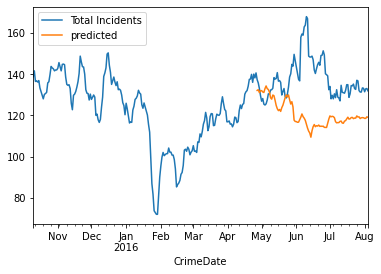

In [20]:
window_size, step_size = 100, 100

model = models.OneStepForecaster(window_size, step_size)

preds, err = model.fit(data[:-step_size], data[:-step_size])

plt.figure(figsize=(20, 10))
model.plot(data, data)
plt.show()

MSR: 1145.7015733091105


<Figure size 1440x720 with 0 Axes>

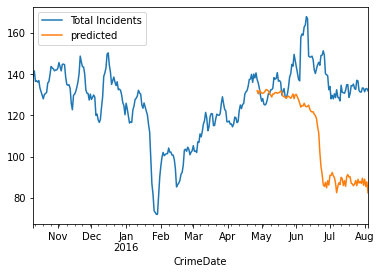

In [21]:
window_size, step_size = 300, 100

model = models.OneStepForecaster(window_size, step_size)

preds, err = model.fit(data[:-step_size], data[:-step_size])

plt.figure(figsize=(20, 10))
model.plot(data, data)
plt.show()

MSR: 134.6337420131153


<Figure size 1440x720 with 0 Axes>

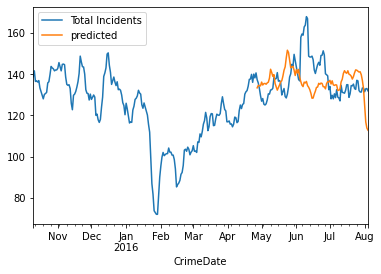

In [22]:
window_size, step_size = 500, 100

model = models.OneStepForecaster(window_size, step_size)

preds, err = model.fit(data[:-step_size], data[:-step_size])

plt.figure(figsize=(20, 10))
model.plot(data, data)
plt.show()